In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [3]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.isnull().sum()#checking null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
copy=df

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.Age.unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [37]:
df.loc[df['Age']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [32]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
df.loc[df['Workclass']==' ?']#we can see this work class is not mentioned

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [36]:
df.Fnlwgt.unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [38]:
df.loc[df['Fnlwgt']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [39]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [40]:
df.loc[df['Education']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [41]:
df.Education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [42]:
df.loc[df['Education_num']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [43]:
df.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [44]:
df.loc[df['Marital_status']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [45]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [46]:
df.loc[df['Occupation']==' ?']#we can also see this data is not mentioned

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [47]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [48]:
df.loc[df['Occupation']=='  ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [49]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [51]:
df.loc[df['Race']=='  ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [53]:
df.Sex.unique()

array([' Male', ' Female'], dtype=object)

In [54]:
df.loc[df['Sex']=='  ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [55]:
df.Capital_gain.unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [68]:
df.loc[df['Capital_gain']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [58]:
df.loc[df['Capital_gain']==0]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#we can see 32560-29849=2711are the data which are not 0

In [62]:
df.Capital_loss.unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [67]:
df.loc[df['Capital_loss']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [63]:
df.loc[df['Capital_loss']==0]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#we can see 32560-31041=1519are the data which are not 0

In [65]:
df.Hours_per_week.unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [66]:
df.loc[df['Hours_per_week']==' ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [69]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [73]:
df.loc[df['Native_country']==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [75]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [77]:
df.loc[df['Income']=='  ']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


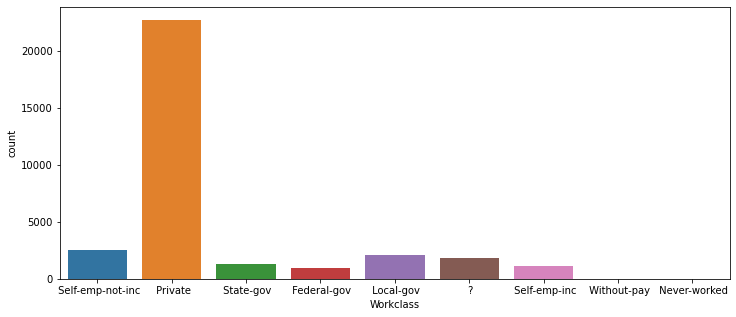

In [112]:
fig_dims=(12,5)
fig,ax=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x='Workclass',data=df,ax=ax)
print(df['Workclass'].value_counts())

In [ ]:
# we can see private sector employees are most but ? category is data to look for

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


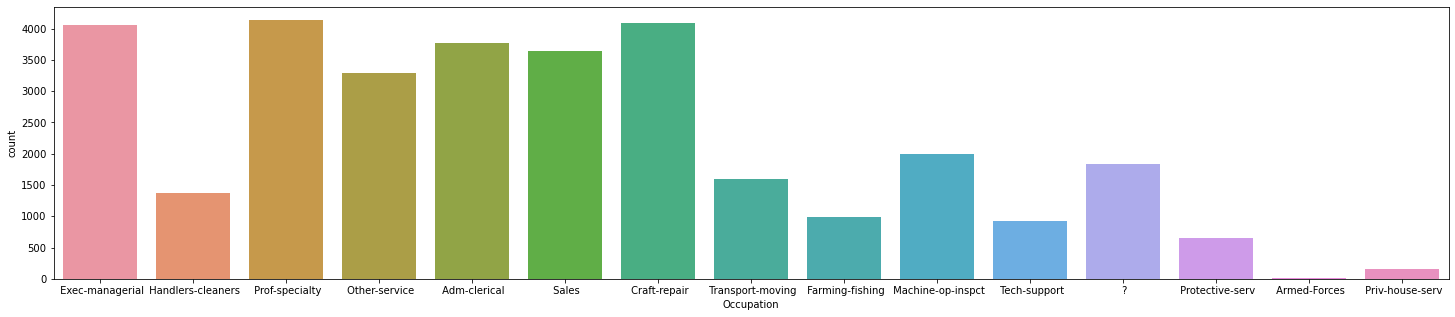

In [113]:
fig_dims=(25,5)
fig,ax=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x='Occupation',data=df,ax=ax)
print(df['Occupation'].value_counts())

In [ ]:
# we can see Prof-specialty, Craft-repair, Exec-managerial  are most but ? category is data to look for

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

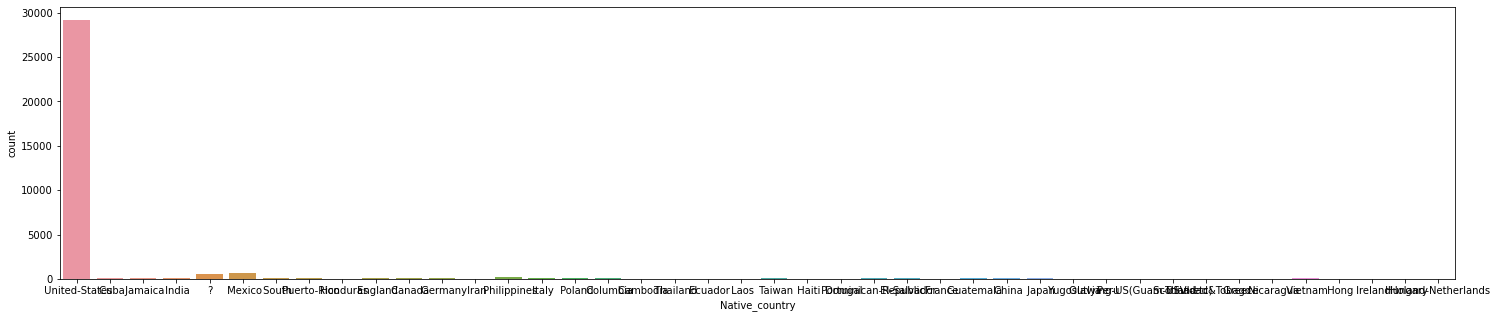

In [108]:
fig_dims=(25,5)
fig,ax=plt.subplots(figsize=fig_dims)
ax=sns.countplot(x='Native_country',data=df,ax=ax)
print(df['Native_country'].value_counts())

In [109]:
#we can see most of the people r from united states 

In [111]:
#lets try to interpret'?'

# filling ? values

In [ ]:
#we are replacing ? with mode data

In [122]:
df['Workclass']=df['Workclass'].replace(' ?','Private')
df['Occupation']=df['Occupation'].replace(' ?','Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?','United-States')


In [125]:
df.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [124]:
df.loc[df['Workclass']==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


Feature Engineering

In [130]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [138]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [141]:
df['Education']=df['Education'].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'school')
df['Education']=df['Education'].replace(' HS-grad','highschool')
df['Education']=df['Education'].replace([' Assoc-voc',' Assoc-acdm',' Prof-school',' Some-college'],'higher than school')
df['Education']=df['Education'].replace(' Bachelors','undergrad')
df['Education']=df['Education'].replace(' Doctorate','doct')
df['Education']=df['Education'].replace(' Masters','master')
                                        


In [142]:
df.Education.value_counts()

highschool            10501
higher than school    10316
undergrad              5354
school                 4253
master                 1723
doct                    413
Name: Education, dtype: int64

In [144]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [146]:
df.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [148]:
df['Marital_status']=df['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df['Marital_status']=df['Marital_status'].replace(' Never-married','not-married')
df['Marital_status']=df['Marital_status'].replace([' Separated',' Divorced',' Widowed',' Married-spouse-absent'],'others')

In [149]:
df.Marital_status.unique()

array(['married', 'others', 'not-married'], dtype=object)

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [152]:
#wew can see than the age vary from 17 to 90
#we can also see than 1 to 99 hr are given per week


In [154]:
Y=df['Income']
X=df.drop(columns = ['Income'])

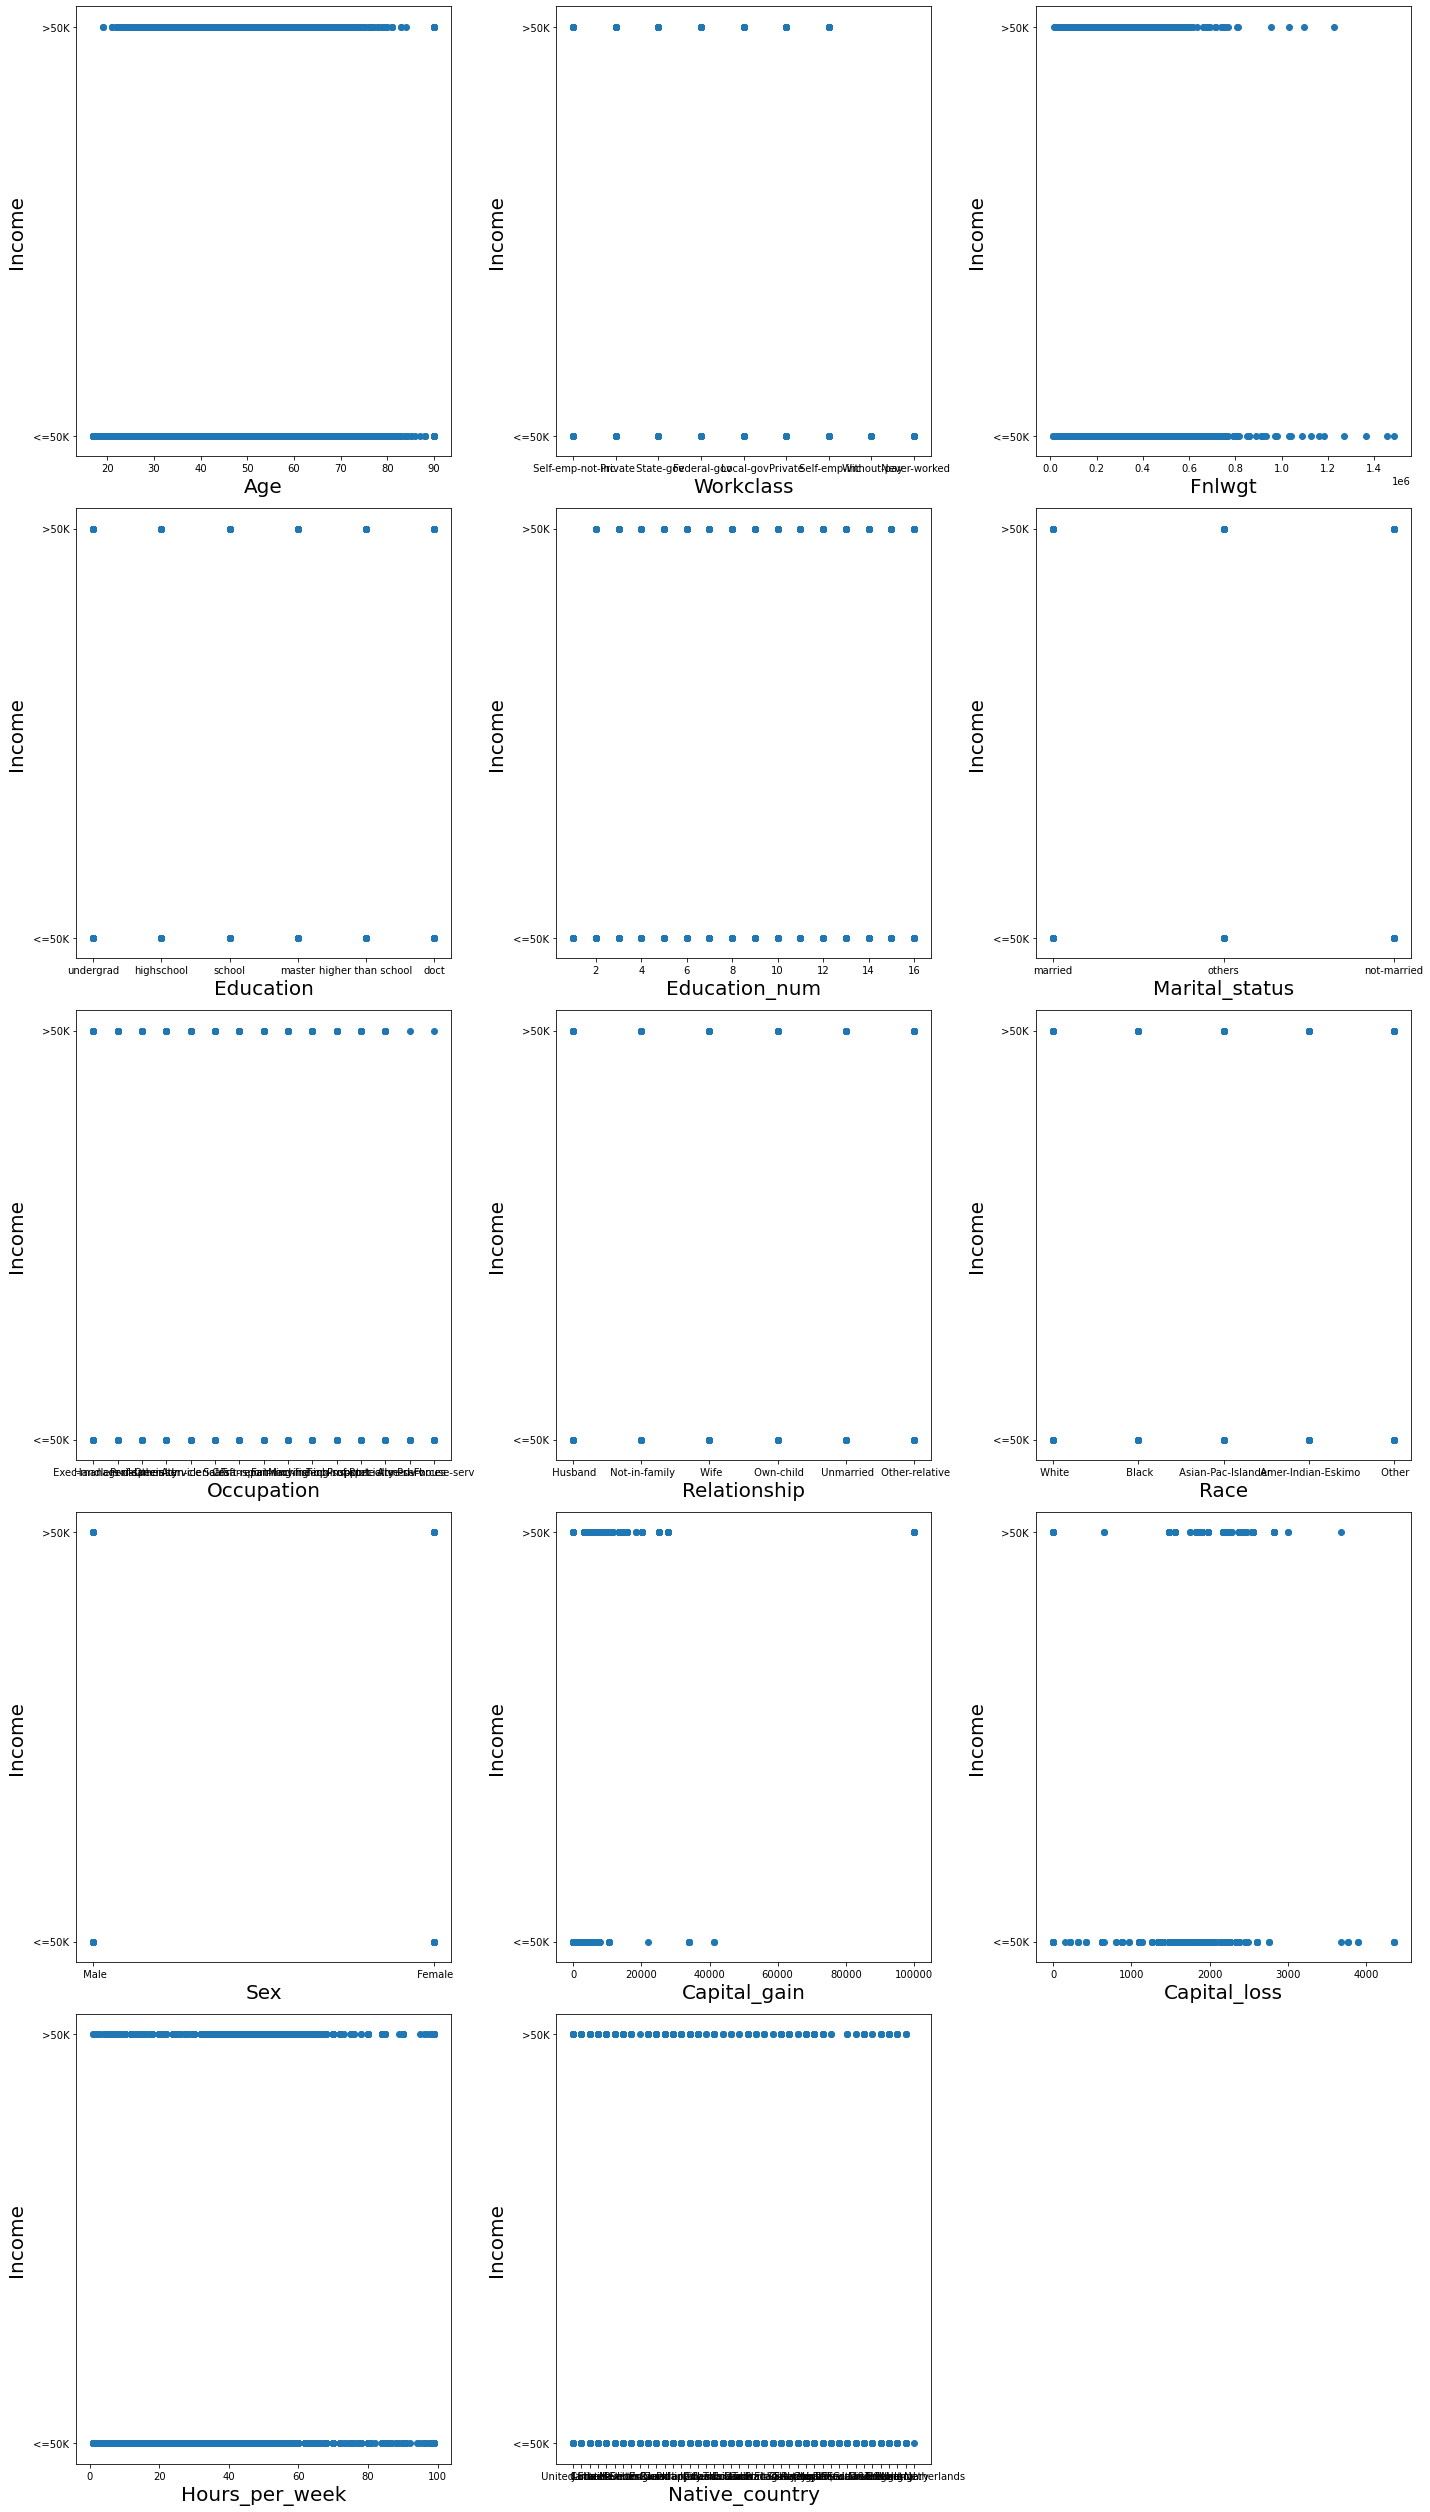

In [157]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [ ]:
#we cant inter pret much 

In [156]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,undergrad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,highschool,9,others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,undergrad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,master,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,higher than school,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,highschool,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,highschool,9,others,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,highschool,9,not-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [161]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

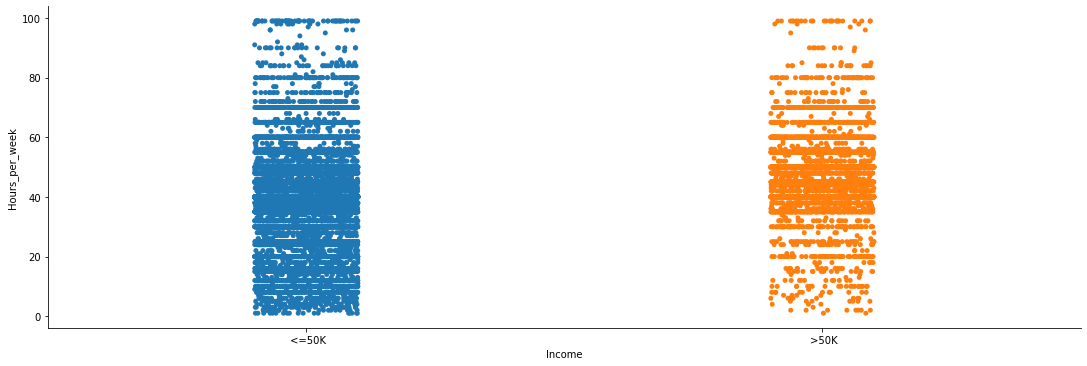

In [162]:
sns.catplot(x='Income',y='Hours_per_week',data=df,aspect=3)


In [164]:
#we dont see much difference 

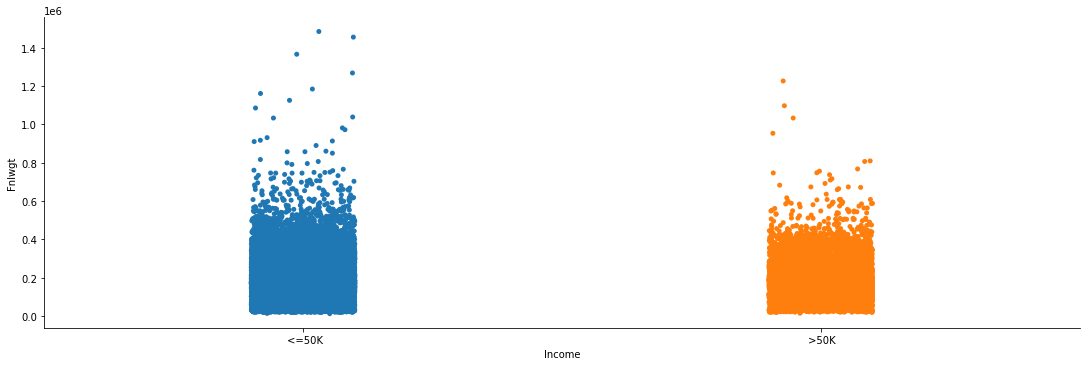

In [166]:
sns.catplot(x='Income',y='Fnlwgt',data=df,aspect=3)


In [168]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [170]:
en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

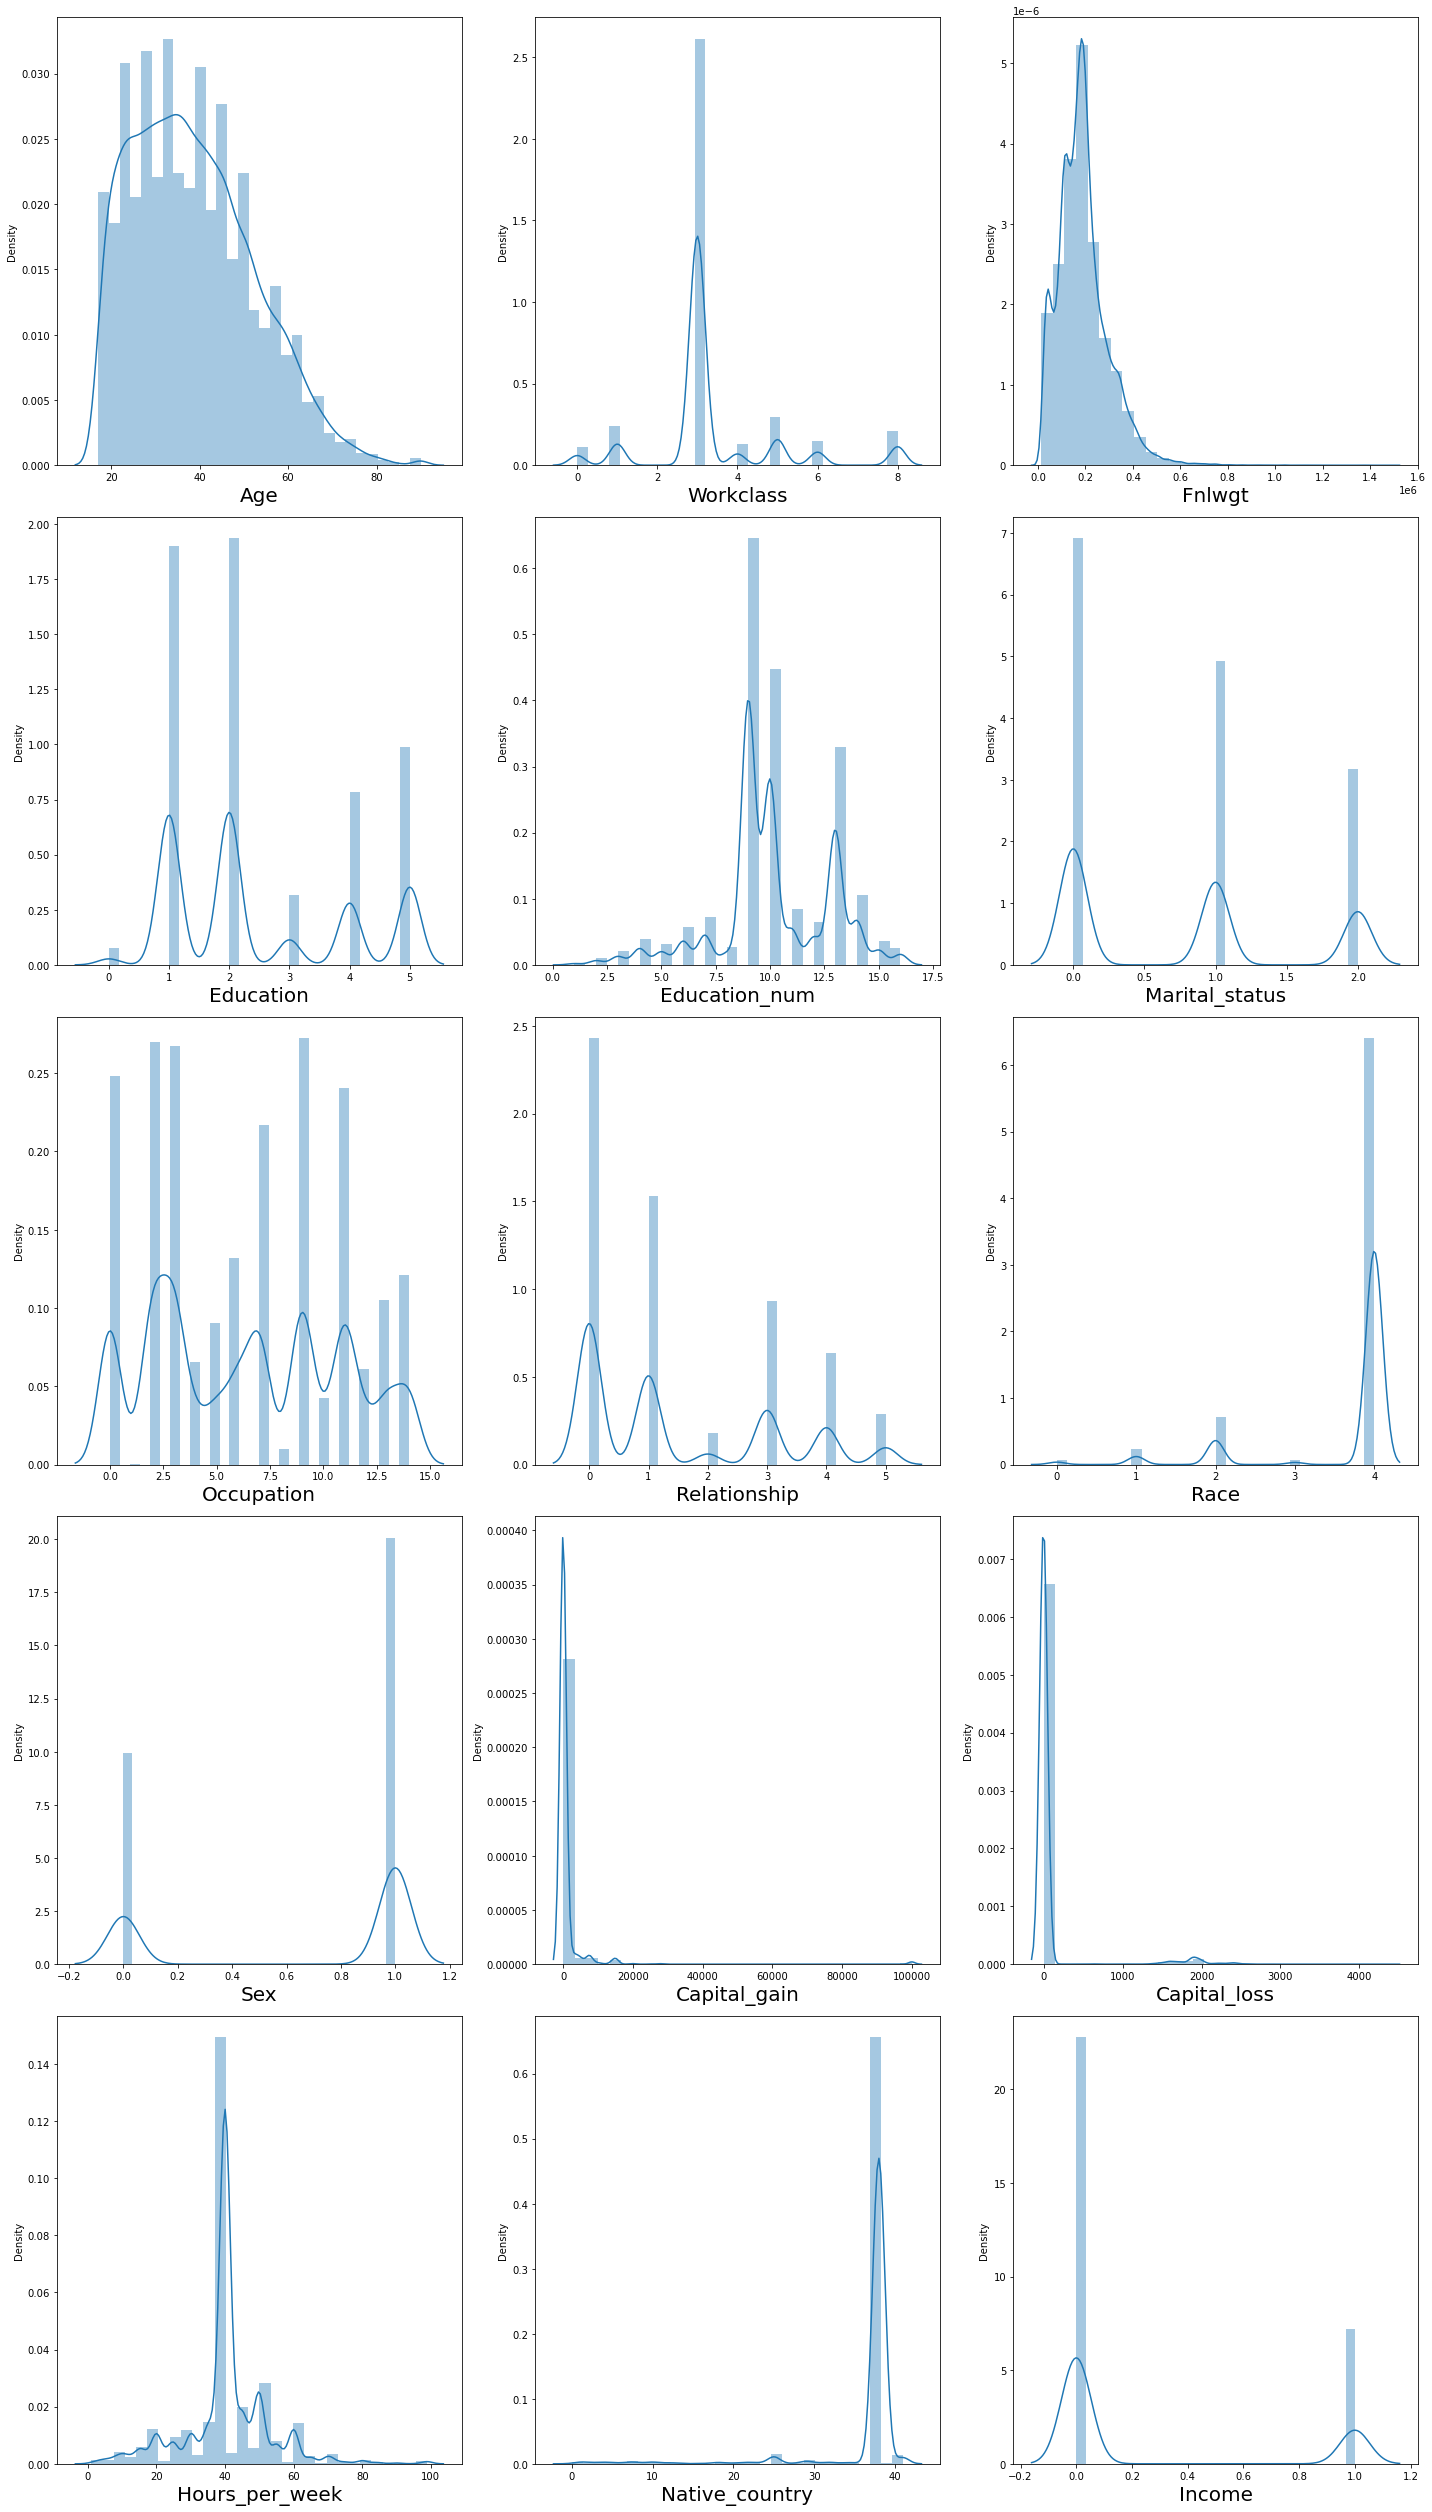

In [172]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [ ]:
#we can see that age show a range some where between 15 to 95,as interpreted above and it also shows skewness in leftside
#we can see in fnlwgt that the there is a right skewness
#we can also inter pret that capital gain and loss are not mucxh in the data se mostly 0


In [173]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,0.036525,0.036527,-0.080862,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.023309,-0.054412,-0.008939,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,0.013494,-0.043159,0.011379,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,0.036525,-0.023309,0.013494,1.000000,0.040981,-0.044645,0.050958,-0.050831,-0.000291,0.042511,0.007654,0.011700,0.016119,-0.055840,0.068370
Education_num,0.036527,-0.054412,-0.043159,0.040981,1.000000,-0.090654,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.080862,-0.008939,0.011379,-0.044645,-0.090654,1.000000,-0.018044,0.468589,-0.080179,-0.447080,-0.069578,-0.065873,-0.152753,-0.000918,-0.377016
Occupation,0.012628,0.312611,-0.000569,0.050958,0.044150,-0.018044,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.050831,-0.094145,0.468589,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,-0.000291,0.031825,-0.080179,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,0.042511,0.012256,-0.447080,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


<AxesSubplot:>

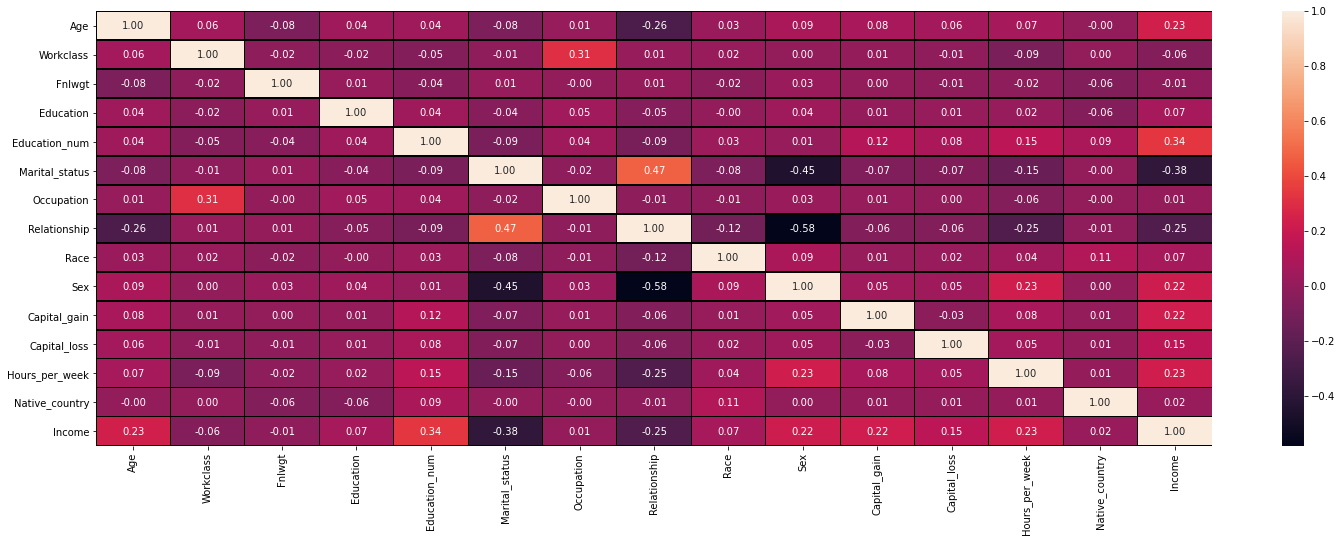

In [174]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

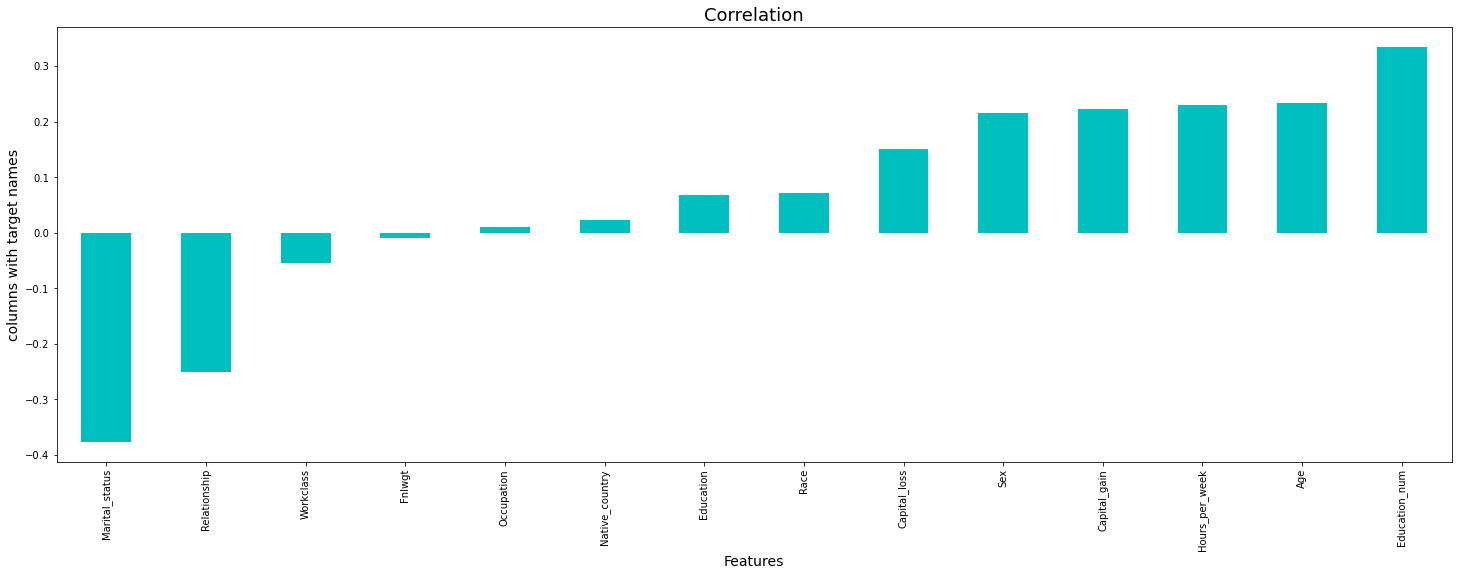

In [180]:
plt.figure(figsize=(25,8))
df.corr()['Income'].sort_values(ascending=True).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [181]:
#we can see that doesnt have much correlation with any of the col,umns has the most witheducation num

In [182]:
df.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education          0.591628
Education_num     -0.311630
Marital_status     0.466930
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

In [183]:
#as we can see that the data mostly have so much skewness

In [184]:
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)


In [185]:
df.skew()

Age              -0.013897
Workclass         0.136107
Fnlwgt            0.016914
Education         0.010856
Education_num     0.023885
Marital_status    0.084929
Occupation       -0.203407
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -1.596543
Income            1.212383
dtype: float64

In [187]:
#we have reduced the skewness and we are taking the threshold 0.5

In [186]:
df.skew()[np.abs(df.skew())<0.5].all()

True

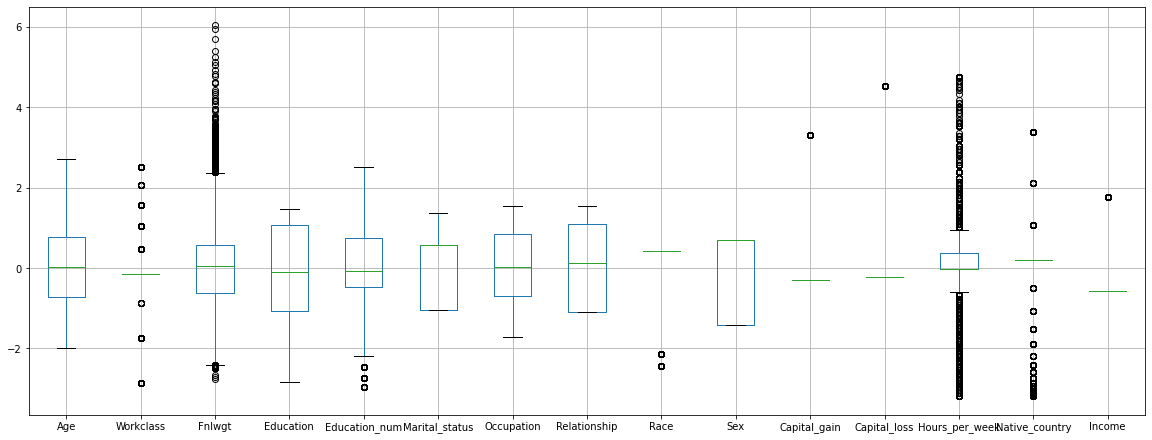

In [188]:
df.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [195]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     5,     7, ..., 32546, 32547, 32559], dtype=int64),
 array([13, 13, 10, ..., 13, 10, 10], dtype=int64))

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.891947,1.048189,-1.089889,1.476604,1.164793,-1.038264,-0.701180,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-2.221515,0.206067,-0.563210
1,0.102717,-0.155415,0.398743,-0.106082,-0.464330,1.364545,-0.195068,0.134511,0.412893,0.703087,-0.30137,-0.221213,-0.035570,0.206067,-0.563210
2,1.064381,-0.155415,0.562540,1.070121,-1.200274,-1.038264,-0.195068,-1.094635,-2.431920,0.703087,-0.30137,-0.221213,-0.035570,0.206067,-0.563210
4,0.028023,-0.155415,0.957182,0.563173,1.600809,-1.038264,-0.701180,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.035570,0.206067,-0.563210
6,1.007823,1.048189,0.345456,-0.106082,-0.464330,-1.038264,-0.701180,-1.094635,0.412893,0.703087,-0.30137,-0.221213,0.369410,0.206067,1.775537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,-1.358341,-0.155415,1.144034,-1.080206,-0.075517,0.579126,0.843100,0.134511,0.412893,0.703087,-0.30137,-0.221213,-0.035570,0.206067,-0.563210
32555,-0.827983,-0.155415,0.746749,-1.080206,0.739697,-1.038264,1.204635,1.549018,0.412893,-1.422298,-0.30137,-0.221213,-0.197550,0.206067,-0.563210
32556,0.247374,-0.155415,-0.193298,-0.106082,-0.464330,-1.038264,0.033228,-1.094635,0.412893,0.703087,-0.30137,-0.221213,-0.035570,0.206067,1.775537
32557,1.334556,-0.155415,-0.219755,-0.106082,-0.464330,1.364545,-1.723001,1.351388,0.412893,-1.422298,-0.30137,-0.221213,-0.035570,0.206067,-0.563210


In [197]:
X=df_new_z.drop("Income",axis=1)
Y=df_new_z['Income']

In [198]:
sc=StandardScaler()# standerdizing the data
X=sc.fit_transform(X)
X

array([[ 0.93563514,  1.04369403, -1.07382188, ...,  0.        ,
        -2.36433745,  0.13380913],
       [ 0.1542386 , -0.15096334,  0.44526119, ...,  0.        ,
         0.03664838,  0.13380913],
       [ 1.10635804, -0.15096334,  0.61240935, ...,  0.        ,
         0.03664838,  0.13380913],
       ...,
       [ 0.29745986, -0.15096334, -0.15888997, ...,  0.        ,
         0.03664838,  0.13380913],
       [ 1.37385194, -0.15096334, -0.18588812, ...,  0.        ,
         0.03664838,  0.13380913],
       [-1.29232016, -0.15096334,  0.31558704, ...,  0.        ,
        -1.74208285,  0.13380913]])

In [200]:
Y=Y.astype(int)
Y.dtypes

dtype('int32')

In [202]:
lr=LogisticRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {accuracy_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {accuracy_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.8438766174356294
At random state0,the testing  accuracy is :- 0.838855126445795


At random state1,the training accuracy is :- 0.8434191608940008
At random state1,the testing  accuracy is :- 0.8397373064105077


At random state2,the training accuracy is :- 0.8428310024833355
At random state2,the testing  accuracy is :- 0.8396392864144285


At random state3,the training accuracy is :- 0.8417200365965233
At random state3,the testing  accuracy is :- 0.8418937463242502


At random state4,the training accuracy is :- 0.8451836361259966
At random state4,the testing  accuracy is :- 0.8361105665555774


At random state5,the training accuracy is :- 0.8391059992157888
At random state5,the testing  accuracy is :- 0.846696726132131


At random state6,the training accuracy is :- 0.8398902104300091
At random state6,the testing  accuracy is :- 0.8449323662027054


At random state7,the training accuracy is :- 0.8440073193046661
At random state7,the testing

In [203]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=13)

In [204]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [206]:
pred_test=lr.predict(X_test)
print(accuracy_score(Y_test,pred_test))

0.8431680062732797


In [208]:
Train_accuracy=accuracy_score(Y_train,pred_train)
Test_accuracy=accuracy_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.8415150564617315 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 3 the cv score is 0.8417504592358279 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 4 the cv score is 0.841750313676286 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 5 the cv score is 0.8419465156774335 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 6 the cv score is 0.8415547068509831 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 7 the cv score is 0.8420254800709264 and accuracy score for training is 0.7283361652071625 and accuracy score for testing is 0.8431680062732797


At cross fold 8 the cv score is 0.8417503

In [209]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [215]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute','ball_tree'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsClassifier()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 4}


In [219]:
kn= KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

accuracy_score: 83.39541266418348
cross_val_score: 83.52417747150612


In [217]:
y_pred_kn = kn.predict(X_test)
print("KNeighborsClassifier report: \n\n", classification_report(Y_test, y_pred_kn))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      8233
           1       0.49      0.49      0.49      1969

    accuracy                           0.80     10202
   macro avg       0.69      0.68      0.69     10202
weighted avg       0.80      0.80      0.80     10202



In [218]:
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [220]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

accuracy_score: 84.54224661831013
cross_val_score: 84.59459227586589


RandomRainforestClassifier report: 

               precision    recall  f1-score   support

           0       0.88      0.93      0.91      8233
           1       0.63      0.48      0.55      1969

    accuracy                           0.85     10202
   macro avg       0.76      0.71      0.73     10202
weighted avg       0.83      0.85      0.84     10202



In [222]:
from sklearn.tree import DecisionTreeClassifier


parameters={'criterion':["gini", "entropy"],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [224]:
dt=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',splitter='best')
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dts=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',dts*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

accuracy_score: 80.22936679082532
cross_val_score: 80.13644309758719


In [225]:
y_pred_dt = dt.predict(X_test)
print("DecisionTreeClassifier report: \n\n", classification_report(Y_test, y_pred_dt))

DecisionTreeClassifier report: 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88      8233
           1       0.49      0.48      0.48      1969

    accuracy                           0.80     10202
   macro avg       0.68      0.68      0.68     10202
weighted avg       0.80      0.80      0.80     10202



In [226]:
#as we can see randomrainforest is giving the best score

In [227]:
filename='censusincome.pkl'
pickle.dump(rf,open(filename,'wb'))

In [229]:
loaded_model=pickle.load(open('censusincome.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8454224661831014


In [230]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201
Predicted,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [ ]:
# this is the model